## Import libraries and modules

In [31]:
import pandas as pd
import tensorflow as tf
import numpy as np
from memory_profiler import profile

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV


%matplotlib inline

## Import Datasets


In [32]:
# read in data
df_train = pd.read_csv('incomes_datasets/train.csv')

df_train.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


## Data Preparation

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


### Age


C:\Users\User\AppData\Local\Temp\ipykernel_17876\2544391719.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['age'], bins = 90, color = 'mediumslateblue')


The maximum age is 90
The minimum age is 17


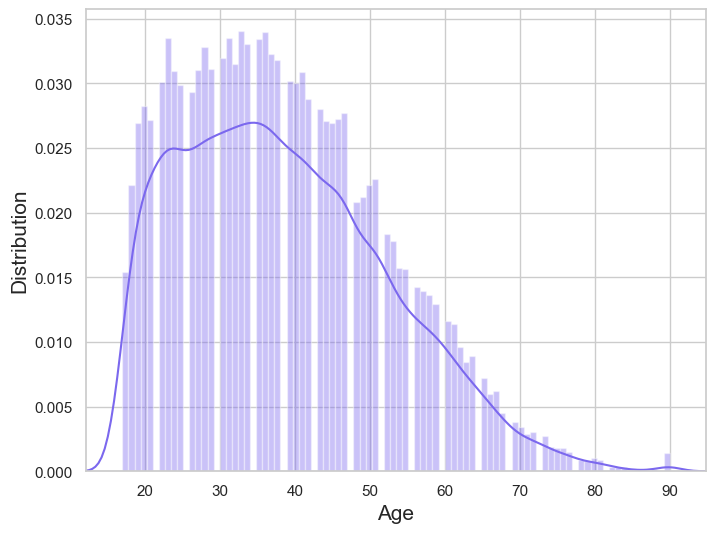

In [34]:
plt.rcParams['figure.figsize'] = [8, 6]
sns.set(style = 'whitegrid')

sns.distplot(df_train['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df_train['age'].max())
print ("The minimum age is", df_train['age'].min())

In [35]:
df_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [36]:
df_train.drop(columns='educational-num')

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


### Int Type Columns 

In [43]:
int_columns = ['age','fnlwgt','hours-per-week']

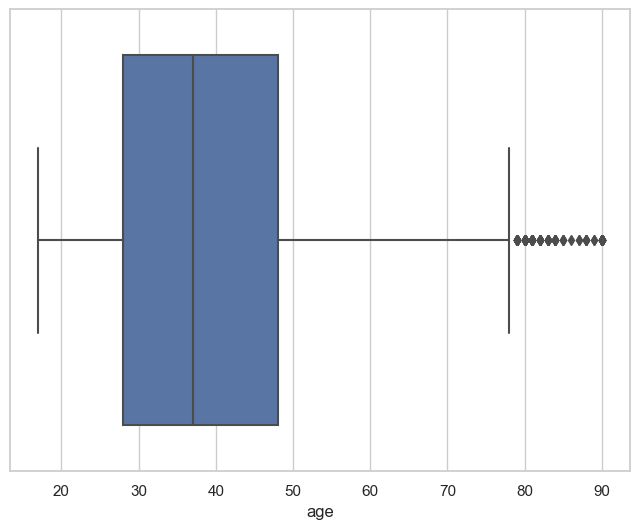

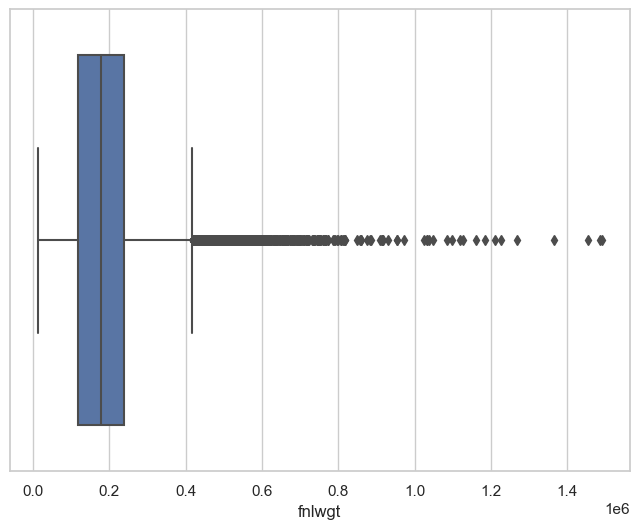

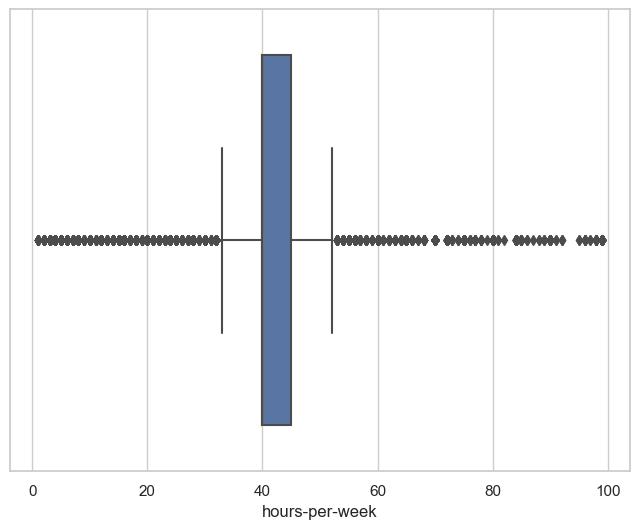

In [44]:
for i in int_columns:
  sns.boxplot(x = df_train[i])
  plt.show()

In [48]:
education_data = df_train.groupby("education")["income_>50K"].count()
education_data = education_data.reset_index()

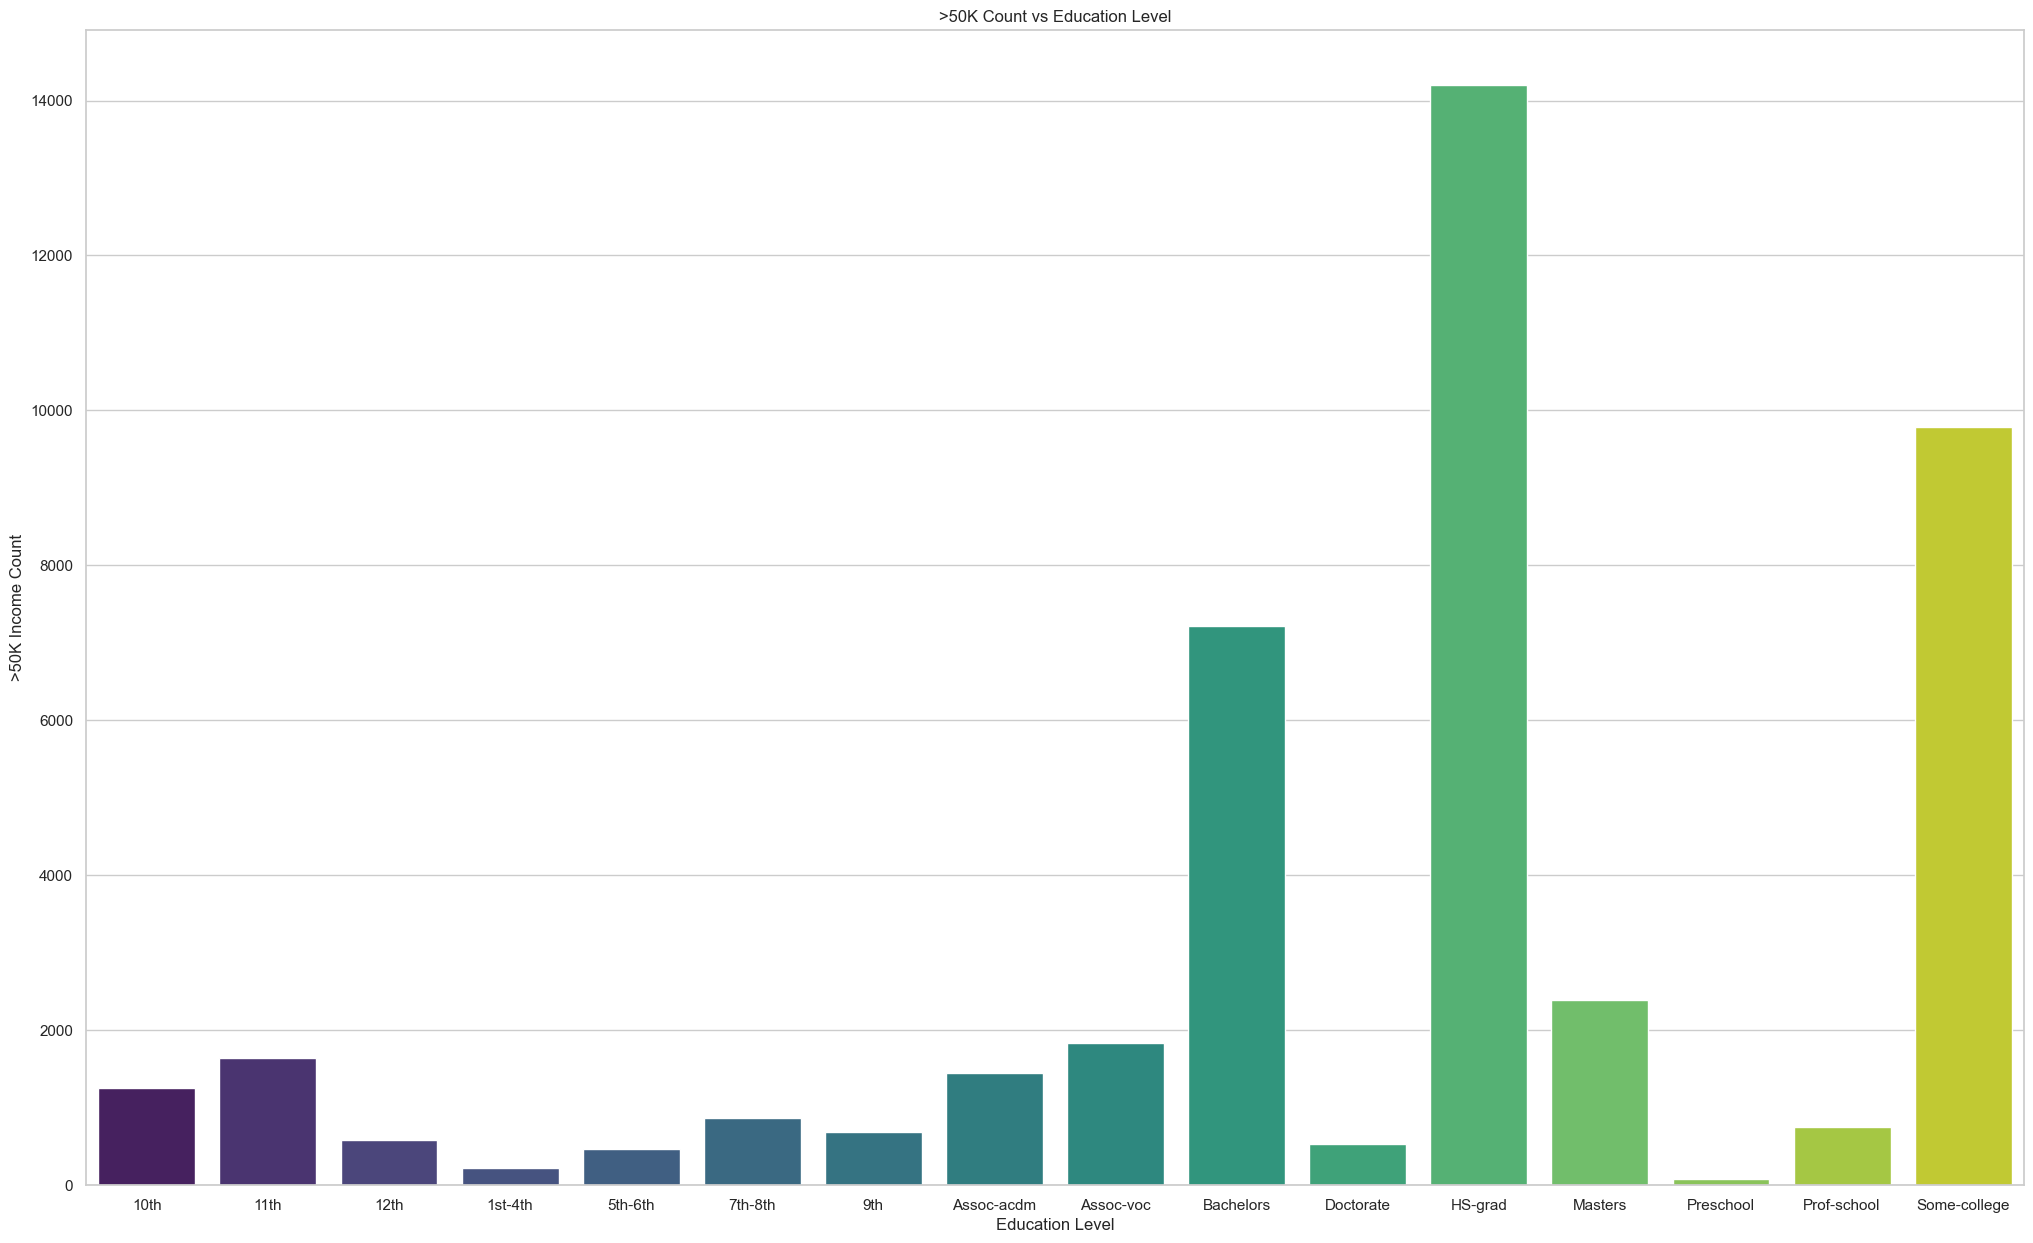

In [52]:
plt.figure(figsize = (25,15))
sns.barplot(x = "education", y ="income_>50K", data = education_data, palette = "viridis")
plt.xlabel("Education Level")
plt.ylabel(">50K Income Count")
plt.title(">50K Count vs Education Level")
plt.show()

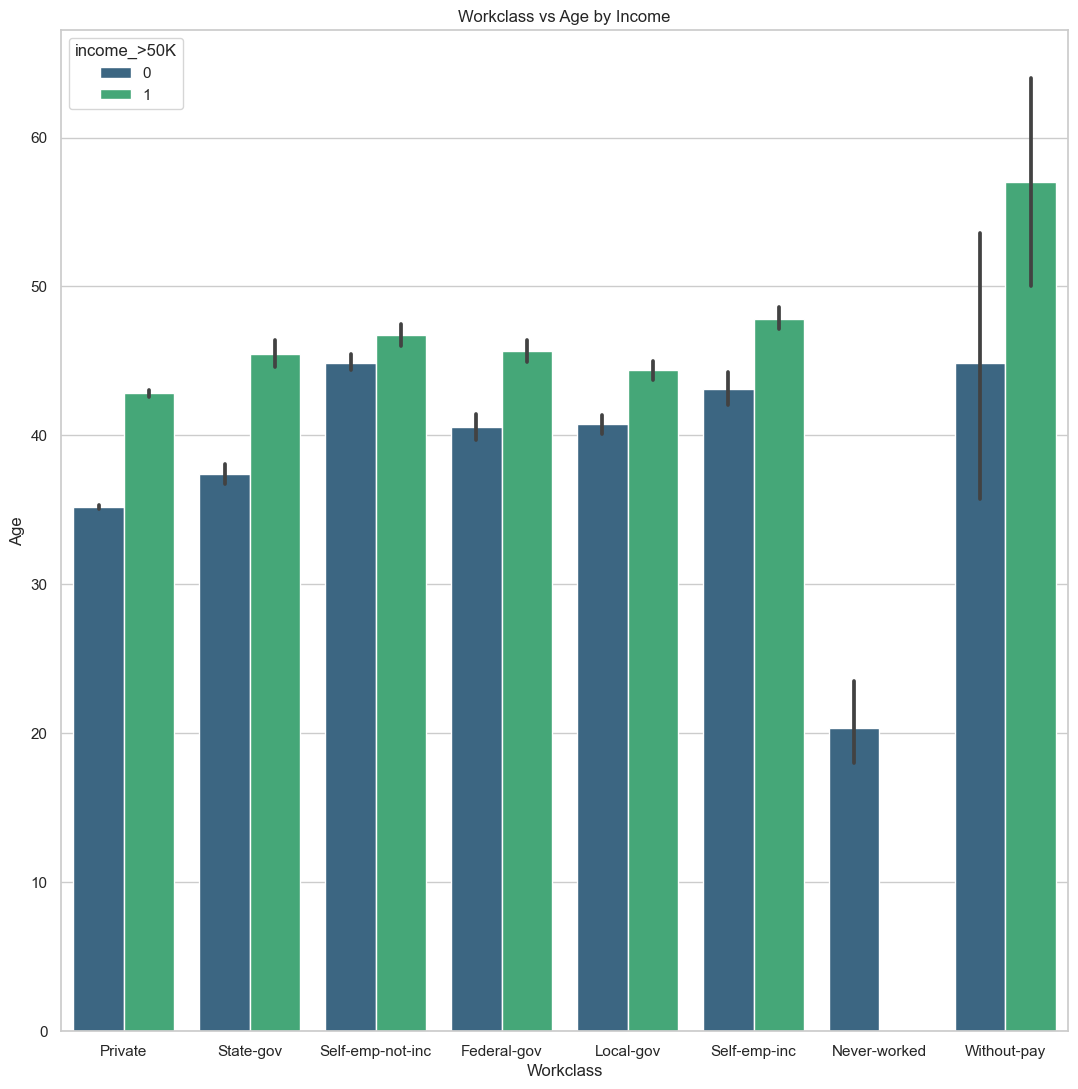

In [55]:
plt.figure(figsize= (13,13))
sns.barplot(x="workclass",y="age", hue="income_>50K", data=df_train, palette = "viridis")
plt.xlabel("Workclass")
plt.ylabel("Age")
plt.title("Workclass vs Age by Income")
plt.show()

### Heatmap 

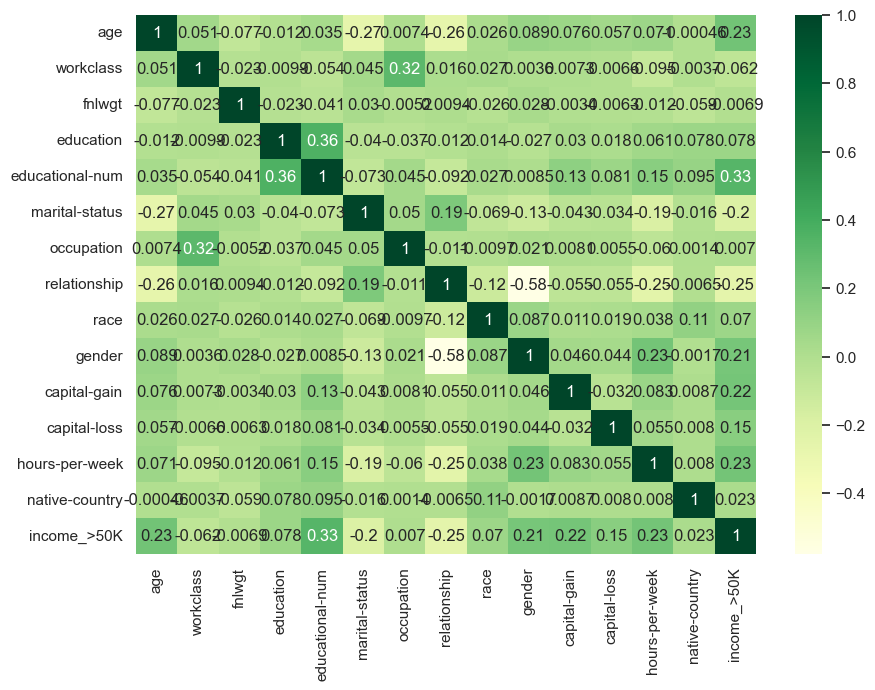

In [ ]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_train.corr(), annot = True, color = 'blue', cmap = 'YlGn');

In [56]:
#change dataframe to numerical 
def columns_encoder(dataframe):
    type_obj_columns_= [x for x in dataframe.columns if dataframe[x].dtype != 'int64']

    for i in type_obj_columns_:
        dataframe[i] = LabelEncoder().fit_transform(dataframe[i])
    return dataframe

#noramlize function
def columns_normalize(dataframe,type):
    #normalization df
    if type == 'absmax':
        for c in dataframe.columns:
	        dataframe[c] = dataframe[c] / (dataframe[c].abs().max())
    elif type == 'minmax':
        for c in dataframe.columns:
            dataframe[c] = (dataframe[c] - dataframe[c].min()) / (dataframe[c].max() - dataframe[c].min())
    return dataframe 

In [57]:
columns_encoder(dataframe=df_train)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,3,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,3,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,3,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,6,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,6,149248,15,10,4,7,1,2,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,3,68982,9,13,2,3,0,4,1,0,0,50,38,1
43953,19,3,116562,11,9,4,7,3,4,0,0,0,40,38,0
43954,30,3,197947,15,10,0,11,1,4,1,0,0,58,38,0
43955,46,3,97883,9,13,4,11,1,4,0,0,0,35,38,0


In [58]:
columns_normalize(dataframe = df_train,type='absmax')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,0.744444,0.375,0.245857,0.666667,1.0000,0.000000,0.214286,0.2,1.0,1.0,1.0,0.0,0.606061,0.926829,1.0
1,0.188889,0.375,0.164118,0.133333,0.5000,0.666667,0.500000,0.6,1.0,1.0,0.0,0.0,0.151515,0.926829,0.0
2,0.344444,0.375,0.116882,0.600000,0.8125,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.404040,0.926829,1.0
3,0.644444,0.750,0.073939,0.333333,0.2500,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.404040,0.926829,0.0
4,0.277778,0.750,0.100140,1.000000,0.6250,0.666667,0.500000,0.2,0.5,1.0,0.0,0.0,0.404040,0.926829,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.577778,0.375,0.046284,0.600000,0.8125,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.505051,0.926829,1.0
43953,0.211111,0.375,0.078209,0.733333,0.5625,0.666667,0.500000,0.6,1.0,0.0,0.0,0.0,0.404040,0.926829,0.0
43954,0.333333,0.375,0.132815,1.000000,0.6250,0.000000,0.785714,0.2,1.0,1.0,0.0,0.0,0.585859,0.926829,0.0
43955,0.511111,0.375,0.065676,0.600000,0.8125,0.666667,0.785714,0.2,1.0,0.0,0.0,0.0,0.353535,0.926829,0.0


In [59]:
df_train = df_train.fillna(0)
df_train.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [60]:
df_train.to_csv('income_train.csv')